In [1]:
import treecorr
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline

In [2]:
filename = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/mass_sheets_behind_z3/cmb_maps/cmblensmap_total_gausshiz_masked.fits'

In [3]:
mapfile = hp.read_map(filename)
print(len(mapfile))

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
201326592


In [4]:
index = np.arange(201326592)

In [5]:
theta, phi = hp.pix2ang(nside=4096, ipix=index)
mask_kcmb = (phi>0)*(phi<np.pi/2)*(theta>np.pi/2)
print(True in mask_kcmb)

True


the above is to pick up the octant that has data

In [39]:
kcmb = mapfile[mask_kcmb]
ra_K = phi[mask_kcmb]
dec_K = np.pi/2-theta[mask_kcmb]
print(kcmb)

[ 0.00170215  0.09302823  0.09426145 ... -0.06422222 -0.12017739
 -0.09952184]


Convert lon and lat to ra and dec (in degrees)

In [7]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [8]:
data = gc.get_quantities(['ra', 'dec', 'shear_1', 'shear_2', 'redshift'])

In [32]:
mask_redshift = (data['redshift']>0.2)*(data['redshift']<0.3) #the foreground shear?

In [33]:
ra0 = data['ra'][mask_redshift]
dec0 = data['dec'][mask_redshift]

In [34]:
mask_G = (ra0>0)*(ra0<90)*(dec0<0)
ra_G = ra0[mask_G]
dec_G = dec0[mask_G]
print(dec_G)

[-39.03470387 -39.02967575 -39.02289191 ... -39.15142208 -39.15033602
 -39.18218801]


restrict galaxies to the same octant where we have Kcmb data

In [40]:
cat_G = treecorr.Catalog(ra=ra0, dec=dec0, ra_units='deg', dec_units='deg', g1=data['shear_1'][mask_redshift], g2=data['shear_2'][mask_redshift])
cat_K = treecorr.Catalog(ra=ra_K, dec=dec_K, k=kcmb, ra_units='rad', dec_units='rad')

In [36]:
kg = treecorr.KGCorrelation(nbins=20, min_sep=2.5/60/180/np.pi, max_sep=100./60/180/np.pi)

In [41]:
kg.process(cat_K, cat_G)
xi = kg.xi
xi_im = kg.xi_im
R = np.exp(kg.logr)

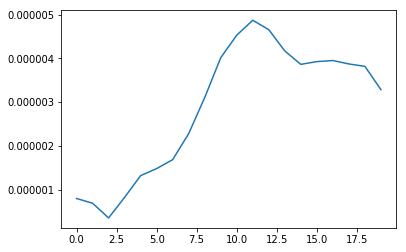

In [42]:
plt.plot(xi)